In [1]:
import pandas as pd
from numpy.linalg import svd
import matplotlib.pyplot as plt
import numpy as np
#use pandas to import the dataset
df = pd.read_csv("iris.csv")
df.columns =["sepal length","sepal width","petal length","petal width","classes"]

In [2]:
X=df.iloc[:,(df.columns!="classes")]
y=df.loc[:,(df.columns=="classes")]
#use pandas to turn the classes into integers
y=pd.factorize(y['classes'])[0] 
print("X has shape:",X.shape)
print("y has shape:",y.shape)

#calculate min and max variance for the RFB kernel gridsearch function
#center the data first
X_center = X.copy()
mean = X.mean()
X_center-=mean
min_var = min(X_center.var())
max_var = max(X_center.var())
print("minimum variance:",min_var)
print("maximum variance:",max_var)
print("training data is: ")
#display the first few training examples
print(X.head())

print("\n")
print("information about the initial centered training data is: ")
print(X_center.describe())

    

X has shape: (149, 4)
y has shape: (149,)
minimum variance: 0.18792127698167987
maximum variance: 3.096372211137314
training data is: 
   sepal length  sepal width  petal length  petal width
0           4.9          3.0           1.4          0.2
1           4.7          3.2           1.3          0.2
2           4.6          3.1           1.5          0.2
3           5.0          3.6           1.4          0.2
4           5.4          3.9           1.7          0.4


information about the initial centered training data is: 
       sepal length   sepal width  petal length   petal width
count  1.490000e+02  1.490000e+02  1.490000e+02  1.490000e+02
mean  -1.704826e-15 -8.464519e-16 -2.187661e-15 -8.643347e-16
std    8.285941e-01  4.334989e-01  1.759651e+00  7.612920e-01
min   -1.548322e+00 -1.051007e+00 -2.774497e+00 -1.105369e+00
25%   -7.483221e-01 -2.510067e-01 -2.174497e+00 -9.053691e-01
50%   -4.832215e-02 -5.100671e-02  6.255034e-01  9.463087e-02
75%    5.516779e-01  2.489933e-01  

# Part A: Use PCA to visualise data in 2-D

Top 2 PC's are: [[ 0.36263433 -0.08122848  0.85629752  0.35868209]
 [ 0.6558202   0.73001455 -0.17703033 -0.07509244]]


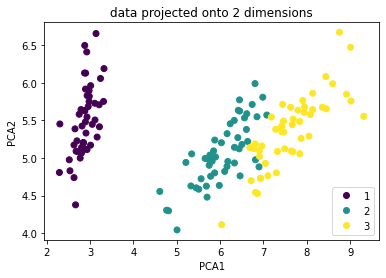

In [3]:
#when using PCA we need to subtract the mean
mean = np.mean(X,axis=0)
printPC = False
def PCA(X,n,mean): #X is training data, n is the number of top PC's to return
    X_t = X.copy()
    #subtract the mean for SVD
    X_t-=mean
    #get matrices using SVD
    U,S,V = svd(X_t,full_matrices=True)
    
    #only return the top n principal components
    printPC=False
    if printPC:
        print("for the given number of PC's, V has shape",V[:n].shape)
    return V[:n]
print("Top 2 PC's are:",PCA(X,2,mean))
PC_2 = PCA(X,2,mean)
#project the data into 2-d space
X_trans=np.dot(X,PC_2.T)
PC_4=PCA(X,4,mean)
#project X along top-4 PC's
X_4=np.dot(X,PC_4.T)


#categorise the classes from 1-3 so that a legend can be plotted on the graph
classes = ['1', '2', '3']
values = y



scatter =plt.scatter(X_trans[:,0],X_trans[:,1],c =y,label =y)
plt.title("data projected onto 2 dimensions")
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()


In [4]:

#initialize the weight arrays as 0,each row corresponds to 1 class 
uniqueC=len(np.unique(y))
print("number of unique classes are:",uniqueC)
def initialize(s1,s2):
    w = np.zeros((s1,s2))
    b= np.zeros((s2,1))
    return w,b


number of unique classes are: 3


In [5]:
#optional learning rate
#keep it at 1 for the perceptron algorithm
lr = 1
cost_arr =[]
#quick sanity check
print("y has shape",y.shape)
print("X has shape",X.shape)

y has shape (149,)
X has shape (149, 4)


# Part B: MultiClass Perceptron algorithm

In [6]:

#define the training process for the multiclass perceptron
#epochs here denote the iterations

#shuffle function, can fix the seed or generate a new one with each iteration 
def shuffle(arr,seed):
    arr=pd.DataFrame(arr)
    arr = arr.sample(frac=1,random_state=seed)
    return np.array(arr)
    

def MC_perceptron(epochs,X,y,w,b,Print =True):
    #err_arr can be a global variable to obtain the final accuracy for the 2 cases
    global err_arr
    err_arr = []
    for i in range(epochs+1):
        #print(y)
        err =0
        #create seed with each iteration
        seed = np.random.randint(0,1000)
        
        X=shuffle(X,seed)
        y=shuffle(y,seed)
        y=y.reshape((y.shape[0],))
        for j in range(len(y)):
            #make prediction using the weight matrices and bias
            yhat = np.dot(X[j],w)+b.T
            yhat = np.array(yhat)
            #obtain the class with the highest value after prediction
            yhat = np.argmax(yhat,axis=1)
            yhat =int(yhat)
            #print("yhat is:",yhat)
            if(yhat!=y[j]):
                #if there is a mismatch increment the err variable
                err+=1
                #correctly pick the right column of the weights to update
                w[:,yhat]-=lr*X[j]
                w[:,y[j]]+=lr*X[j]
                #correctly pick the right basis entry to update
                b[yhat]-=lr
                b[y[j]]+=lr
                
        #append to error array so we can plot the error with every epoch
        err_arr.append(err/len(y))
        
    if Print:   
        print("accuracy is: ",1-err/len(y))
        print("error is",err)
    #create a dictionary to store the weights and biases
    weights = {"w":w,"b":b}
    
    #code below prints the error after training
    #uncomment if needed
    
    #print("learned weights are",w)
    #print("learned bias is :",b)
    #iterat =np.linspace(0,epochs+1,epochs+1)
    #plt.plot(iterat,err_arr)
    #plt.xlabel("epoch")
    #plt.ylabel("relative error")
    #plt.show()
    
    
    return weights,err
   

initial w is [[0. 0. 0.]
 [0. 0. 0.]]  with shape:  (2, 3)
initial b is [[0.]
 [0.]
 [0.]]  with shape:  (3, 1)


Final accuracy for projecting data along top 2 PC's:  0.9060402684563759


initial w is [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]  with shape:  (4, 3)
initial b is [[0.]
 [0.]
 [0.]]  with shape:  (3, 1)
Final accuracy after projecting to top 4 PC's:  0.9328859060402684


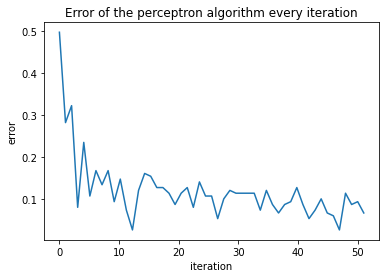

In [7]:
w,b=initialize(X_trans.shape[1],uniqueC)
print("initial w is",w," with shape: ",w.shape)
print("initial b is",b," with shape: ",b.shape)
weight_PC=MC_perceptron(50,X_trans,y,w,b,Print =False)[0] 
print("\n")
#get final accuracy from err_arr[-1]
print("Final accuracy for projecting data along top 2 PC's: ",1-err_arr[-1])
print("\n")
w,b=initialize(X.shape[1],uniqueC)
print("initial w is",w," with shape: ",w.shape)
print("initial b is",b," with shape: ",b.shape)
MC_perceptron(50,X_4,y,w,b,Print =False) 
print("Final accuracy after projecting to top 4 PC's: ",1-err_arr[-1])

#can visualise how the error decreases with each iteration
epochs=50
iter_arr = np.linspace(0,epochs+1,epochs+1)
plt.plot(iter_arr,err_arr)
plt.title("Error of the perceptron algorithm every iteration")
plt.xlabel("iteration")
plt.ylabel("error")
plt.show()

# The code block below is not part of the coursework but I thought it gives some insight into how the data is separated in 2D

In [8]:
#this function visualises the decision boundary in the plane when the data is projected along
#the top 2 PC's
def decision_boundary(X,y,w,b):
    #plot 1000 points in the mesh along each axis
    h=1000
    
    #finds the bounds on the domain where we will plot the the mesh
    min1, max1 = X[:, 0].min()-0.1, X[:, 0].max()+0.1
    min2, max2 = X[:, 1].min()-0.1, X[:, 1].max()+0.1
    
    #create meshgrid to plot in
    xx, yy = np.meshgrid(np.linspace(min1, max1, h),
                       np.linspace(min2,max2, h))
    #turn the mesh into coordinates so we can make predictions
    data1 = np.c_[xx.ravel(), yy.ravel()]
    meshgrid =[]
    
    #predict the labels using every point in the mesh
    yhat = np.dot(data1,w)+b.T
    yhat = np.array(yhat)
    
    #obtain the correct label for each datapoint in 2-D space
    output = np.argmax(yhat,axis=1)
    output =output.reshape(xx.shape)
    plt.contourf(xx,yy,output,cmap="cool",alpha=0.5)
    scatter = plt.scatter(X[:,0],X[:,1],c =y)
    plt.legend(handles=scatter.legend_elements()[0], labels=classes)
    plt.title("data projected along top 2 PC's with decision boundary")
    plt.xlabel("PCA1")
    plt.ylabel("PCA2")
    plt.show()
    

after training for 500 epochs the decision boundary looks like this
initial w is [[0. 0. 0.]
 [0. 0. 0.]]  with shape:  (2, 3)
initial b is [[0.]
 [0.]
 [0.]]  with shape:  (3, 1)


Final accuracy for projecting data along top 2 PC's:  0.9328859060402684




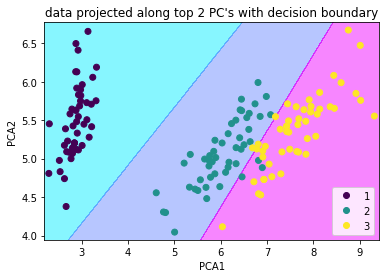

In [9]:
#this function allows us to visualise how the perceptron algorithm separates the 3 classes
print("after training for 500 epochs the decision boundary looks like this")
w,b=initialize(X_trans.shape[1],uniqueC)
print("initial w is",w," with shape: ",w.shape)
print("initial b is",b," with shape: ",b.shape)
weight_PC=MC_perceptron(500,X_trans,y,w,b,Print =False)[0] 
print("\n")
#get final accuracy from err_arr[-1]
print("Final accuracy for projecting data along top 2 PC's: ",1-err_arr[-1])
print("\n")
decision_boundary(X_trans,y,weight_PC["w"],weight_PC["b"])

# Part C: Projection onto a high-dimensional subspace

In [50]:
from scipy.spatial.distance import pdist, squareform
from scipy.linalg import eigh
print("x has shape",X.shape)


#function below contains comments as well as some utility code (commented out) as a sanity check
#to make sure the code works as intended
#it has been commented out since the gridsearch runs 

def kernel(X,y,gamma,comps):
    #use pdist to calculate the pairwise eucledian distances
    #for the kernel, ||x_i-x_j||^2
    
    dist = pdist(X,"sqeuclidean")
    #print(dist)
    #print("dist has shape",dist.shape)
    
    #convert the output of pdist into a square matrix which contains the pairwise eucledian distances
    #this is needed for the matrix K
    Mat = squareform(dist)
    #print("mat has shape",Mat.shape)
    
    K=np.exp(-gamma*Mat) #now apply exp(....) to obtain Matrix K for the specified kernel
    
    #print("K has shape",K.shape)
    
    #create n*n matrix with entries 1/n
    A = np.ones((K.shape[0],K.shape[0]))/int(K.shape[0])
    
    #print("A has shape",A.shape)
    
    #normalize K
    K_tilde = K-A.dot(K)-K.dot(A)+A.dot(K).dot(A)
    
    #print("normalized K has shape",K_tilde.shape)
    K_t = K_tilde.copy()
    
    
    #obtain eigenvalues, they will contain the top PC's used to project the data
    U,S,V = svd(K_t,full_matrices=True)
    #only return the top n principal components
    #print("V has shape",V.shape)
    top_PC= V[:comps]
    #transpose to make sure it has the correct shape
    top_PC= top_PC.T
    

    #print("top_PC has shape",top_PC.shape)
    #print("K_tilde has shape",K_tilde.shape)
    
    #project the matrix K_tilde into a higher dimensional subspace
    top_comp = np.dot(K_tilde,top_PC)
    #print(top_PC)
    #print("top comp has shape",top_comp.shape)
    
    
    return top_comp
    
dummy = kernel(X,y,0.01,2)

            
    
    

x has shape (149, 4)


minimum gamma is: 0.1589131756980735
maximum gamma is: 3.6252564574675095
[0.16, 0.26, 0.36, 0.46, 0.56, 0.66, 0.76, 0.86, 0.96, 1.06, 1.16, 1.26, 1.36, 1.46, 1.56, 1.66, 1.76, 1.86, 1.96, 2.06, 2.16, 2.26, 2.36, 2.46, 2.56, 2.66, 2.76, 2.86, 2.96, 3.06, 3.16, 3.26, 3.36, 3.46, 3.56, 3.66, 3.76, 3.86, 3.96, 4.06, 4.16, 4.26, 4.36, 4.46, 4.56]
the gridsearch matrix is,
[[6. 2. 6. 6. 4. 2. 4. 5. 2. 2. 5. 5. 6. 7. 4. 4. 3. 4. 4. 4. 6. 6. 7. 4.
  4. 4. 2. 5. 5. 6. 4. 4. 5. 3. 4. 3.]
 [6. 2. 6. 4. 8. 2. 3. 6. 4. 6. 4. 3. 5. 5. 3. 5. 4. 4. 6. 7. 4. 4. 5. 6.
  4. 6. 3. 4. 5. 3. 5. 4. 4. 2. 5. 2.]
 [5. 5. 6. 6. 6. 5. 6. 6. 7. 5. 6. 4. 6. 4. 4. 3. 3. 5. 2. 4. 4. 5. 4. 2.
  5. 4. 5. 4. 3. 5. 4. 4. 4. 5. 4. 2.]
 [4. 5. 7. 5. 6. 3. 7. 6. 4. 5. 3. 4. 8. 4. 3. 6. 3. 3. 3. 4. 5. 3. 5. 4.
  5. 4. 6. 4. 4. 3. 3. 3. 3. 4. 2. 6.]
 [4. 8. 6. 6. 2. 3. 3. 7. 5. 5. 4. 4. 5. 7. 4. 3. 4. 3. 4. 2. 4. 5. 5. 1.
  6. 5. 2. 4. 4. 3. 5. 4. 3. 4. 1. 5.]
 [8. 4. 6. 3. 6. 4. 4. 7. 3. 3. 3. 4. 3. 4. 6. 7. 8. 2. 4. 4. 5.

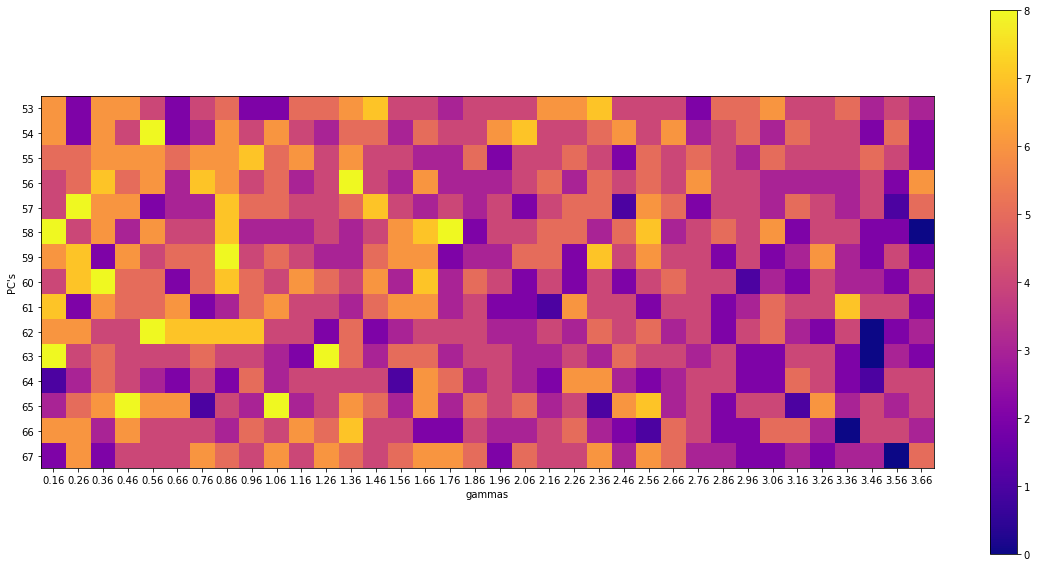

In [54]:
gamma_arr = []
#specify the starting PC 
# and the range of PC's to plot
start_comp =53
n_PC=15
#array to store tick labels
PC_arr = PC_arr = [(start_comp +i) for i in range(n_PC)]
def gridsearch():
    epsilon = 0.05
    global min_gamma,max_gamma
    #create the bounds for the parameter gamma
    min_gamma =1/(2*(max_var+epsilon))
    max_gamma = 1/(2*(min_var-epsilon))
    print("minimum gamma is:",min_gamma)
    print("maximum gamma is:",max_gamma)
    
    #increment in steps of 0.1
    increment =0.1
    
    #start from the minimum value
    gamma = min_gamma
    
    #number of iterations to train for
    epochs =50
    global gridsearch_m
    
    
    #create gridsearch matrix where we will store the error results
    gridsearch_m =np.zeros((n_PC,int((max_gamma-min_gamma)/increment)+2))
    
    #helps keep track of columns when assigning values to gridsearch_m
    col =0
    PC_arr = [(start_comp +i) for i in range(10)]
    #if needed we can print components and accuracy every iteration
    print_state = False
    #the while loop ensures we go through every range of gammas, the 
    while(gamma<=max_gamma+1):
        #round gamma to 2 deciman places
        gamma_arr.append(round(gamma,2))
        i=1
        for comps in range(start_comp,start_comp +n_PC):
            
            
            #set print_state to true to print out components and gamma every iteration
            if print_state:
                print("for component ",comps," and gamma: ",gamma,)
            X_tr = kernel(X,y,gamma,comps)
            
            #initialize the weight matrices
            w,b=initialize(X_tr.shape[1],uniqueC)
            
            #train the classifier with the current N.O. components and gamma
            # set print variable to False as there are many iterations, output will be long
            weight_PC,error = MC_perceptron(epochs,X_tr,y,w,b,Print =False)
            
            #making sure we are not out of bounds for the matrix
            if(col<=int((max_gamma-min_gamma)/increment)+1):
                gridsearch_m[i-1][col]=error
            i+=1
        #after rows (comps) are looped over increment the column variable
        col+=1    
        #increment gamma by 0.1
        gamma+=0.1
    print(gamma_arr)

gridsearch()
#prints out the gridsearch matrix, it is then plotted below with matshow
print("the gridsearch matrix is,")
print(gridsearch_m)
print("it has shape", np.array(gridsearch_m).shape)
print("pc array has length",len(PC_arr)) 
#creates a heatmap using the errors for each parameter, components used and the value of gamma
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
cax = ax.matshow(gridsearch_m,cmap ="plasma")
fig.colorbar(cax)
ax.set_xticks(np.arange(0,len(gridsearch_m[0]),1))
ax.set_xticklabels(gamma_arr)
ax.set_yticks(np.arange(0,len(PC_arr),1))
ax.set_yticklabels(PC_arr)
ax.set_xlabel("gammas")
ax.set_ylabel("PC's")
ax.xaxis.set_ticks_position('bottom')
plt.show()